In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# import the csv file 
df = pd.read_csv('kc_house_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# list data types
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# find the number of rows and columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   id             21613 non-null  int64  
 3   date           21613 non-null  object 
 4   price          21613 non-null  float64
 5   bedrooms       21600 non-null  float64
 6   bathrooms      21603 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  yr_built       21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

In [5]:
# data cleaning. Find columns that contain null data
null_data = df.isnull()
null_data_columns = null_data.columns[(null_data == True).any()]
for column in null_data_columns:
    print(f'{column} null value: {null_data[column].sum()} ')

bedrooms null value: 13 
bathrooms null value: 10 


In [6]:
# replace null data with mean then check for null data again
for column in null_data_columns:
    df[column] = df[column].replace(np.nan, df[column].mean())
null_data = df.isnull()
null_data_columns = null_data.columns[(null_data == True).any()]
null_data_columns

Index([], dtype='object')

In [7]:
# drop Unnamed: 0, Unnamed: 0.1, id
df.drop(labels=['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1, inplace=True)

In [8]:
df.describe().T.style.bar(subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.372870,0.926378,1.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.115736,0.768818,0.500000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000
grade,21613.000000,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,13.000000


<AxesSubplot:>

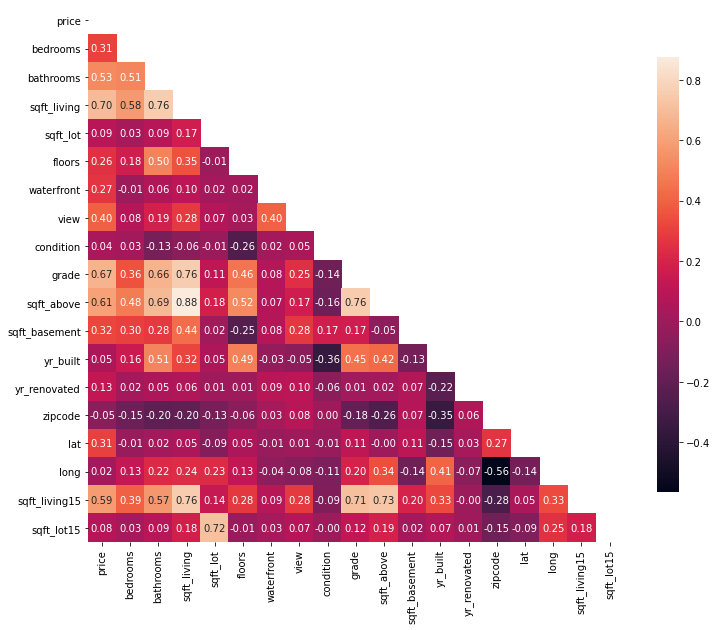

In [9]:
# explanatory data analysis
# plot the heat map and find the coefficient coefficient 
corr_df = df.corr()
%matplotlib inline
mask = np.triu(corr_df)
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr_df, annot=True, square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": 0.8})

In [10]:
# the correlation coefficient for 'price'
corr_df['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [11]:
# split data into train and test data set
from sklearn.model_selection import train_test_split
y_data = df[['price']]
x_data = df.drop(labels=['price', 'date'], axis=1)
(x_train, x_test, y_train, y_test) = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [12]:
# use linear regression to fit the data and get R^2 score on test data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_lm = lm.predict(x_test)
R2_lm = lm.score(x_test, y_test)
print(R2_lm)

0.6858281382573642


In [13]:
# build a pipeline to normalize the data, use polynomial regression (degree=2) to fit the data and 
# get R^2 score on test data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
       ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
yhat_poly = pipe.predict(x_test)
R2_poly = pipe.score(x_test, y_test)
print(R2_poly)

0.8427186951093288


In [14]:
# plot distirbution plot for y_test, linear model and polynomial model
test = y_test.squeeze().rename('Actual Value')
yhat_lm = pd.Series(yhat_lm.reshape(len(yhat_lm)), name=f'Linear model R^2: {R2_lm:.3f}')
yhat_poly = pd.Series(yhat_poly.reshape(len(yhat_poly)), name=f'2nd degree Polynomial R^2: {R2_poly:.3f}')
plot_df = pd.concat([test, yhat_lm, yhat_poly], axis=1)

Text(0.5, 1.0, 'Actual Value vs Linear vs 2nd degree Polynomial')

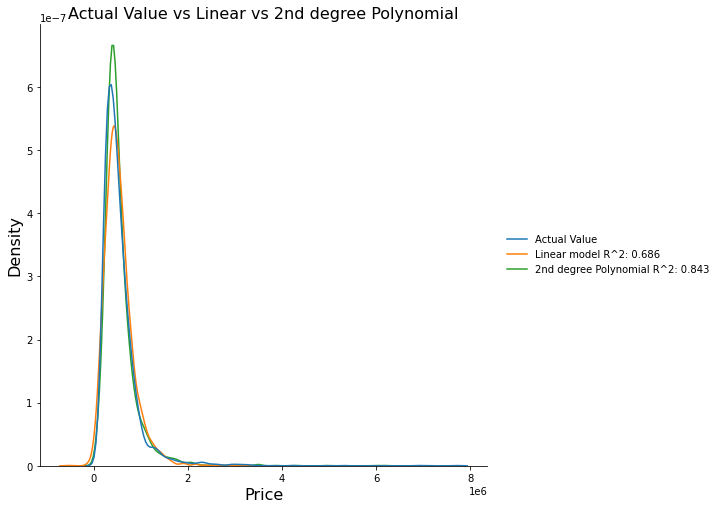

In [15]:
font = {'size' : 16}
sns.displot(data=plot_df, height =7, aspect=1, kind='kde')
plt.xlabel('Price', **font)
plt.ylabel('Density', **font)
plt.title('Actual Value vs Linear vs 2nd degree Polynomial', **font)

In [16]:
# Builde ridge regression model to fit data 
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
# fit_transform train and test data
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

In [17]:
# loop through different alpha value to find the one that minimizes the error
from tqdm import tqdm

R2_ridge_test = []
R2_ridge_train = []
Alpha = 10 * np.arange(100)
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    R2_ridge_test.append(test_score)
    R2_ridge_train.append(train_score)

100%|██████████| 100/100 [00:24<00:00,  4.10it/s, Test Score=0.829, Train Score=0.799]


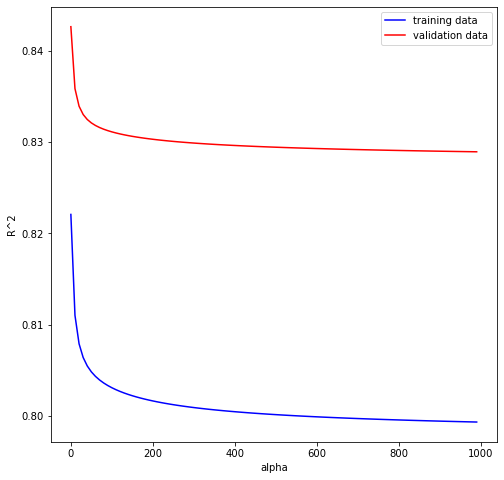

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(Alpha, R2_ridge_train, 'b-', Alpha, R2_ridge_test, 'r-')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['training data', 'validation data'])

In [19]:
# alpha = 0 produces max R^2, plot distribution plot
RidgeModel = Ridge(alpha=alpha) 
RidgeModel.fit(x_train_pr, y_train)
yhat_ridge = RidgeModel.predict(x_test_pr)
R2_ridge = RidgeModel.score(x_test_pr, y_test)
yhat_ridge = pd.Series(yhat_ridge.reshape(len(yhat_ridge)), name=f'Ridge R^2: {R2_ridge: .2f}')
plot_df = pd.concat([plot_df, yhat_ridge], axis=1)

Text(0.5, 1.0, 'Actual vs Linear vs 2nd Degree Polynomial vs Ridge')

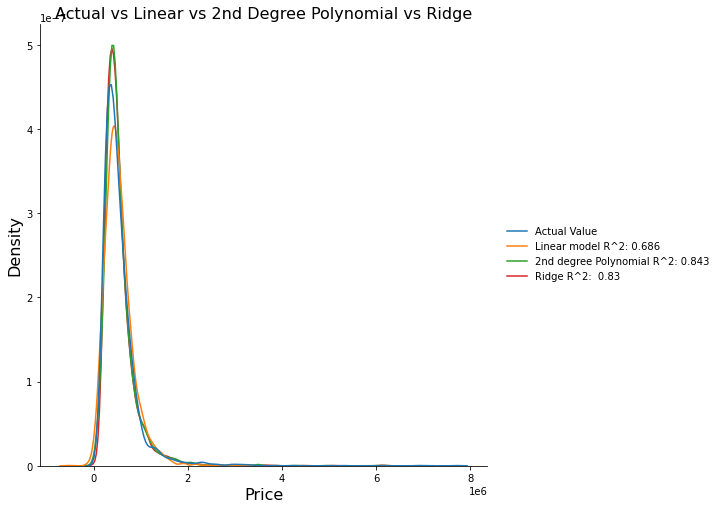

In [21]:
font = {'size' : 16}
sns.displot(data=plot_df, height =7, aspect=1, kind='kde')
plt.xlabel('Price', **font)
plt.ylabel('Density', **font)
plt.title('Actual vs Linear vs 2nd Degree Polynomial vs Ridge', **font)

In [ ]:
# based on the model evaluation, 2nd degree polynomial with normalization produces best estimate. R^2: 0.843